<a href="https://colab.research.google.com/github/shoaibnadafgit/PlantDisease_Final/blob/main/Crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Mounting Dataset From Drive.` 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# `1.Import Libraries.`

In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# `2.Load Data into Train and Test Variables.`

In [ ]:
# My data is in google drive.
test_dir ="/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Test_Dir/"
train_dir="/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/"

# Visualizing The Train and Test Data ..

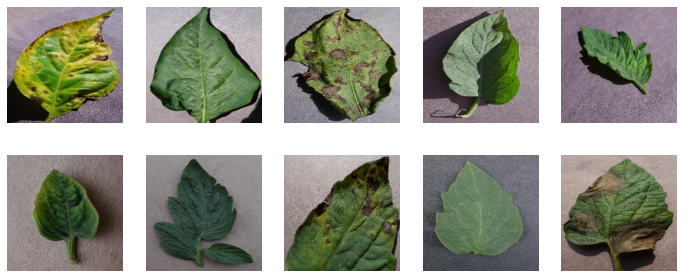

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')

img = mpimg.imread("/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Pepper__bell___Bacterial_spot/afd0c913-1e90-4ff9-9a61-bd0a5297c012___JR_B.Spot 3221.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Pepper__bell___healthy/00100ffa-095e-4881-aebf-61fe5af7226e___JR_HL 7886.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Tomato__Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Tomato__Tomato_mosaic_virus/021accd9-bbb2-4777-8f94-93295e6de49e___PSU_CG 2075.JPG")
plt.imshow(img)


sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Tomato__Tomato_YellowLeaf__Curl_Virus/00139ae8-d881-4edb-925f-46584b0bd68c___YLCV_NREC 2944.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Tomato_Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Tomato_Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Tomato_healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1 (1).JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Tomato_Late_blight/00355ec2-f12c-4015-b8f9-94354f69ce22___RS_Late.B 5311.JPG")
plt.imshow(img)



# `3.Function To count Images In Each Data Set.`

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

15 Classes
15602 Train images
4119 Test images


In [ ]:
# Preprocessing data.
train_datagen= ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
# set height and width of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 15601 images belonging to 15 classes.
Found 4119 images belonging to 15 classes.


In [ ]:
# The name of the 15 diseases.
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

# `4.CNN Parameter Building.`

In [ ]:
# CNN building.
model = Sequential()

model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


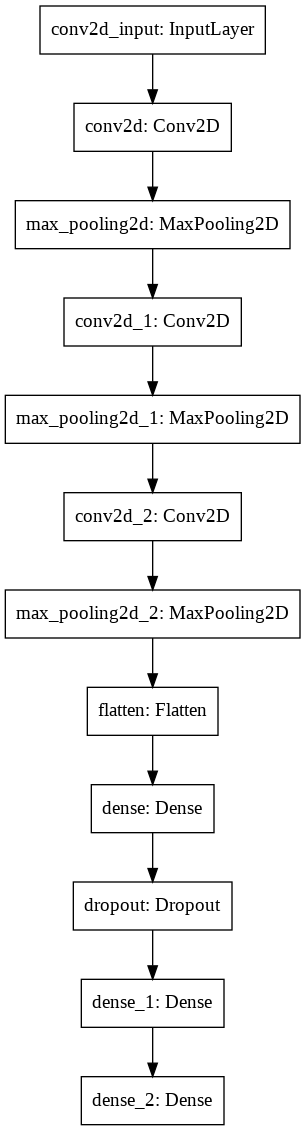

In [ ]:
keras.utils.plot_model(model,"my_CNN_model.png")

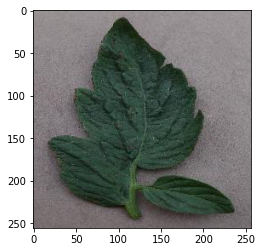

In [ ]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Tomato_Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Train_Dir/Tomato_Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:

# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
#conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)
#max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)
#flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten_1').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
#conv2d_3_features = conv2d_3_output.predict(img)
#max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
#flatten_1_features = flatten_1_output.predict(img)

# `5.Visualizing The Image After Every Layer.`

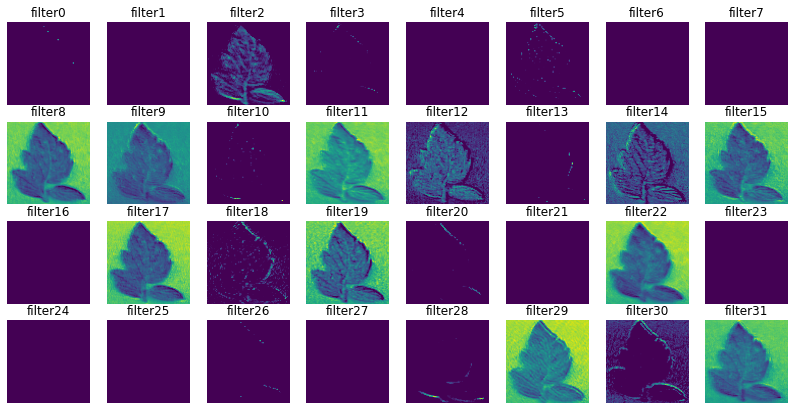

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

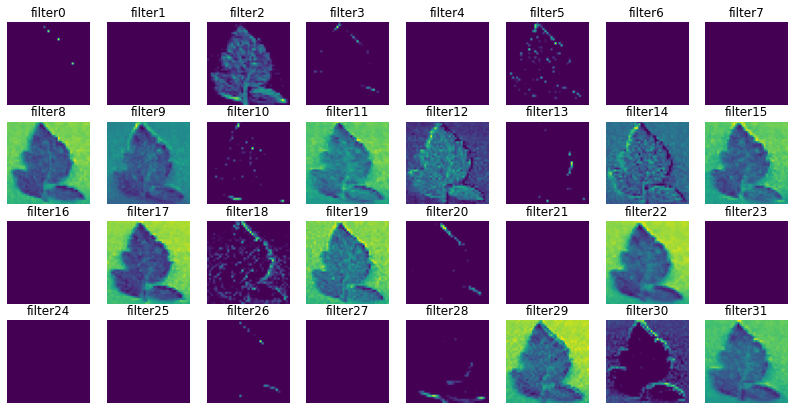

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

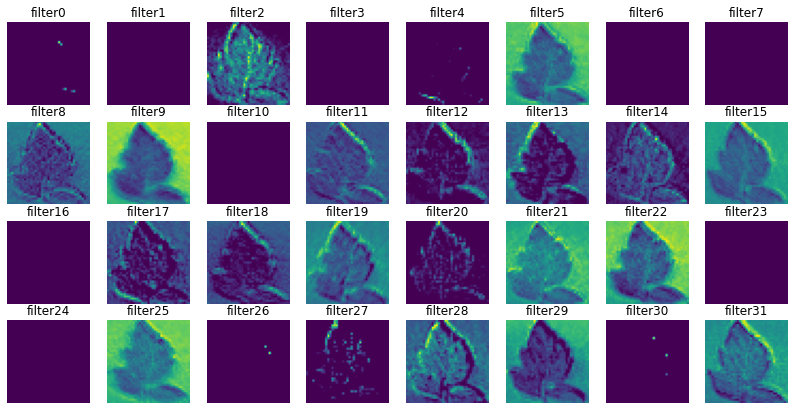

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

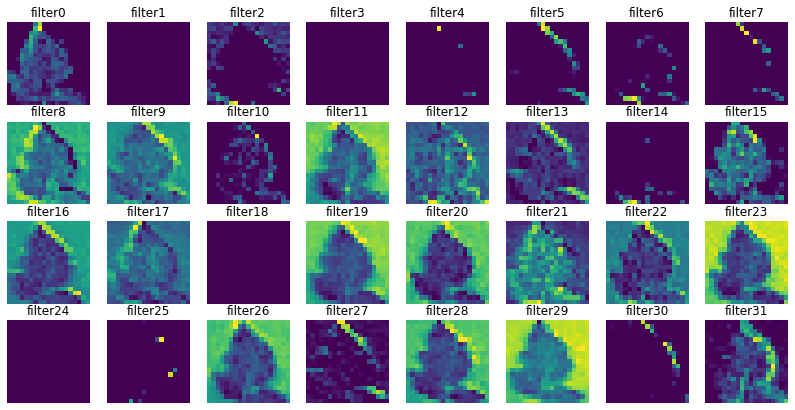

In [ ]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

NameError: ignored

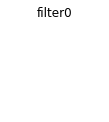

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

NameError: ignored

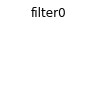

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

# `6.Training The Model.`

In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 15601 images belonging to 15 classes.


In [ ]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=10,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                        verbose=1)



Epoch 1/20
487/487 [==============================] - 7542s 15s/step - loss: 1.7834 - accuracy: 0.4228 - val_loss: 0.6983 - val_accuracy: 0.7641
Epoch 2/20
487/487 [==============================] - 420s 864ms/step - loss: 0.7346 - accuracy: 0.7575 - val_loss: 0.5470 - val_accuracy: 0.8198
Epoch 3/20
487/487 [==============================] - 418s 860ms/step - loss: 0.4872 - accuracy: 0.8365 - val_loss: 0.3330 - val_accuracy: 0.8853
Epoch 4/20
487/487 [==============================] - 418s 859ms/step - loss: 0.3803 - accuracy: 0.8711 - val_loss: 0.2840 - val_accuracy: 0.9029
Epoch 5/20
487/487 [==============================] - 418s 858ms/step - loss: 0.3017 - accuracy: 0.8988 - val_loss: 0.1999 - val_accuracy: 0.9330
Epoch 6/20
487/487 [==============================] - 418s 859ms/step - loss: 0.2643 - accuracy: 0.9113 - val_loss: 0.1788 - val_accuracy: 0.9400
Epoch 7/20
487/487 [==============================] - 418s 860ms/step - loss: 0.2207 - accuracy: 0.9250 - val_loss: 0.1940 - 

# `7.Plot For Accuracy And Losses.`

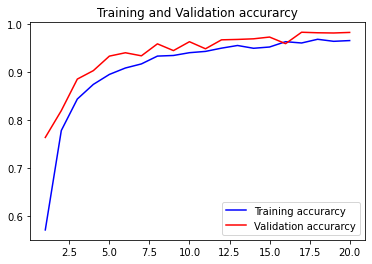

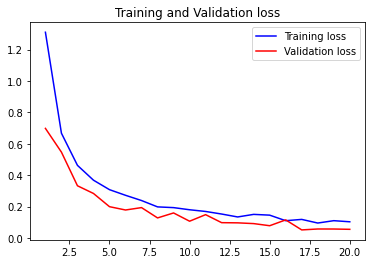

In [ ]:

from keras.callbacks import History 
#history = History()

acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# `8. Evaluate model using unseen data.`


In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

129/129 [==============================] - 2007s 16s/step - loss: 0.2103 - accuracy: 0.9417
Test score is 0.21026690304279327
Test accuracy is 0.9417334198951721


# `9.Saving Model.` 

In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes


NameError: ignored

# `10.Load Model.`

In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___healthy"]


# `11.Time For Predictions.`

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Potato___healthy


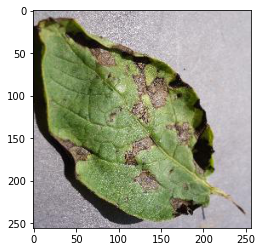

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Test_Dir/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG')])
disease = image.load_img('/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Test_Dir/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG')
plt.imshow(disease)
print (Classes[int(result)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


IndexError: ignored

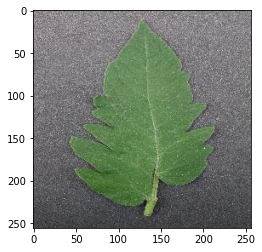

In [ ]:

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
result = model.predict_classes([prepare('/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Test_Dir/Tomato_healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG')])
disease = image.load_img('/content/drive/MyDrive/PlantVillageData/Plantdisease_Train_Test/Test_Dir/Tomato_healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG')
plt.imshow(disease)
print (Classes[int(result)])

# `12.Convert Model To "tflite format."`.
- This conversion is done because to make our model interpertable with App.
- tflite is tensorflowlite made for mobile versions.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import lite
converter = tf.lite.TFLiteConverter.from_keras_model('crop.h5') 
tfmodel = converter.convert() 
open ("output.tflite" , "wb") .write(tfmodel)